In [146]:
from IPython.display import display, HTML

html_code = """
<style>
    /* Contenedor principal con fondo del logo */
    .header-container {
        position: relative;
        background-image: url('https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg');
        background-size: contain;
        background-repeat: no-repeat;
        background-position: center;
        text-align: center;
        padding: 100px 40px;
        background-color: rgba(0, 0, 0, 0.7); /* Fondo oscuro semitransparente */
        border-radius: 10px;
    }

    /* Estilos del texto */
    .header-title {
        font-size: 32px;
        font-weight: bold;
        color: white;
    }

    .header-subtitle {
        font-size: 24px;
        font-weight: bold;
        color: white;
    }

    .header-info {
        font-size: 18px;
        font-weight: normal;
        color: white;
    }
</style>

<div class="header-container">
    <div class="header-title">📌 Fundamentos de Programación - 2025-I</div>
    <div class="header-subtitle">📊 Trabajo Final: Dólar Histórico en Colombia (1991-2024)</div>
    <br>
    <div class="header-info"><strong>👨‍🏫 Docente:</strong> Tomás Atheortua</div>
    <br>
    <div class="header-info">
        <strong>👨‍🎓 Alumnos:</strong> <br>
        1️⃣ Sergio Alejandro Laverde Peña (CC 1.152.217.871) <br>
        2️⃣ Jhon Alejandro Jaramillo Echeverri (CC 1.035.422.452) <br>
        3️⃣ Juan Andrés Ruiz Ramírez (CC 1.121.712.506)
    </div>
</div>
"""

display(HTML(html_code))


<h2>Librerias Necesarias:</h2>

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pychow import ChowTest

<hr>

<h2>Importación de los datos:</h2>
<p>
    <ul>
        <li>Fuente: Superintendencia Financiera de Colombia</li>
        <li>Tema: Tasa de Cambio Representativa del Mercado - TRM</li>
        <li>Link: <a href=https://www.superfinanciera.gov.co/publicaciones/60819/informes-y-cifrascifrasestablecimientos-de-creditoinformacion-periodicadiariatasa-de-cambio-representativa-del-mercado-trm-60819/>https://www.superfinanciera.gov.co/publicaciones/60819/informes-y-cifrascifrasestablecimientos-de-creditoinformacion-periodicadiariatasa-de-cambio-representativa-del-mercado-trm-60819/</a></li>
    </ul>
</p>
<hr>

In [249]:
data = pd.read_csv('./Tasa_de_Cambio_Representativa_del_Mercado-_TRM.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7976 entries, 0 to 7975
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VALOR          7976 non-null   float64
 1   UNIDAD         7976 non-null   object 
 2   VIGENCIADESDE  7976 non-null   object 
 3   VIGENCIAHASTA  7976 non-null   object 
dtypes: float64(1), object(3)
memory usage: 249.4+ KB


<hr>

## ¿Sabías que...?
### Cuando un día es sábado, domingo o festivo en Colombia, a tasa oficial (TRM) seguirá siendo la calculada en el último día que operó el mercado, y tendrá vigencia hasta el día siguiente.

<p><img src="TRM_Calendario.png" style="width: 80%; height: auto;"></p>
<hr>


In [107]:
data.head(10)

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
0,4100.66,COP,15/02/2025,18/02/2025
1,4161.46,COP,14/02/2025,14/02/2025
2,4165.07,COP,13/02/2025,13/02/2025
3,4153.80,COP,12/02/2025,12/02/2025
4,4132.93,COP,11/02/2025,11/02/2025
5,4113.70,COP,08/02/2025,10/02/2025
6,4150.99,COP,07/02/2025,07/02/2025
7,4180.06,COP,06/02/2025,06/02/2025
8,4153.54,COP,05/02/2025,05/02/2025
9,4198.66,COP,04/02/2025,04/02/2025


<hr>

<h2>Estructuración de los datos</h1>
<h3>Reto: Completar todos los días con su respectiva TRM</h2>

<hr>

In [251]:
data.index = pd.to_datetime((data['VIGENCIADESDE']), format='%d/%m/%Y') #Convierte VIGENCIADESDE en dato tipo Datetime, reemplaza indice numerico con fechas
data.sort_index(ascending=True, inplace=True) #Ordena DF según indice, ascendente y modificando el DF directamente
data.head(10)

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
VIGENCIADESDE,,,,
1991-12-02,643.42,COP,02/12/1991,02/12/1991
1991-12-03,639.22,COP,03/12/1991,03/12/1991
1991-12-04,635.70,COP,04/12/1991,04/12/1991
1991-12-05,631.51,COP,05/12/1991,05/12/1991
1991-12-06,627.16,COP,06/12/1991,06/12/1991
1991-12-07,638.06,COP,07/12/1991,09/12/1991
1991-12-10,622.92,COP,10/12/1991,10/12/1991
1991-12-11,627.46,COP,11/12/1991,11/12/1991
1991-12-12,633.09,COP,12/12/1991,12/12/1991


In [253]:
full_dates = pd.date_range(min(data.index), max(data.index)) # Se crea fechas intermedias, incluso las que no estaban
data = data.reindex(full_dates) #Cambia el índice del DataFrame para que incluya todas las fechas en full_dates.
data.head(15)

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
1991-12-02,643.42,COP,02/12/1991,02/12/1991
1991-12-03,639.22,COP,03/12/1991,03/12/1991
1991-12-04,635.70,COP,04/12/1991,04/12/1991
1991-12-05,631.51,COP,05/12/1991,05/12/1991
1991-12-06,627.16,COP,06/12/1991,06/12/1991
1991-12-07,638.06,COP,07/12/1991,09/12/1991
1991-12-08,NaN,NaN,NaN,NaN
1991-12-09,NaN,NaN,NaN,NaN
1991-12-10,622.92,COP,10/12/1991,10/12/1991
1991-12-11,627.46,COP,11/12/1991,11/12/1991


<hr>
<h2>Calendario de diciembre de 1991</h2>
<p><img src="Calendario_1991.png" style="width: 20%; display: block; margin: auto;"></p>
<hr>


In [255]:
data.ffill(inplace=True) # Rellena los valores faltantes (NaN) con el último valor disponible.
data.head(15)

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
1991-12-02,643.42,COP,02/12/1991,02/12/1991
1991-12-03,639.22,COP,03/12/1991,03/12/1991
1991-12-04,635.70,COP,04/12/1991,04/12/1991
1991-12-05,631.51,COP,05/12/1991,05/12/1991
1991-12-06,627.16,COP,06/12/1991,06/12/1991
1991-12-07,638.06,COP,07/12/1991,09/12/1991
1991-12-08,638.06,COP,07/12/1991,09/12/1991
1991-12-09,638.06,COP,07/12/1991,09/12/1991
1991-12-10,622.92,COP,10/12/1991,10/12/1991
1991-12-11,627.46,COP,11/12/1991,11/12/1991


<hr>
<h2>Visualización historica TRM</h2>
<hr>

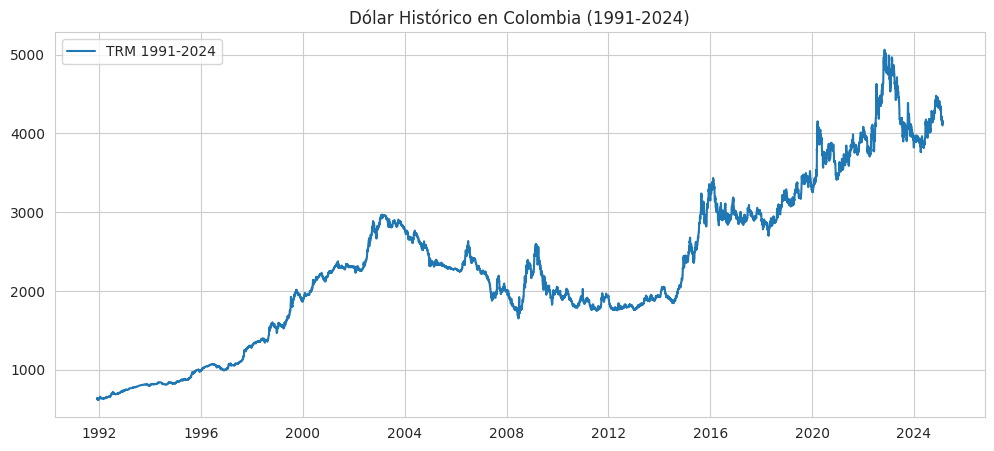

In [378]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
plt.title("Dólar Histórico en Colombia (1991-2024)")
sns.lineplot(
    label = 'TRM 1991-2024',
    y = data['VALOR'],
    x = data.index,
).set(xlabel = None, ylabel = None);

<hr>
<h2>Acontecimientos Historicos</h2>

<hr>


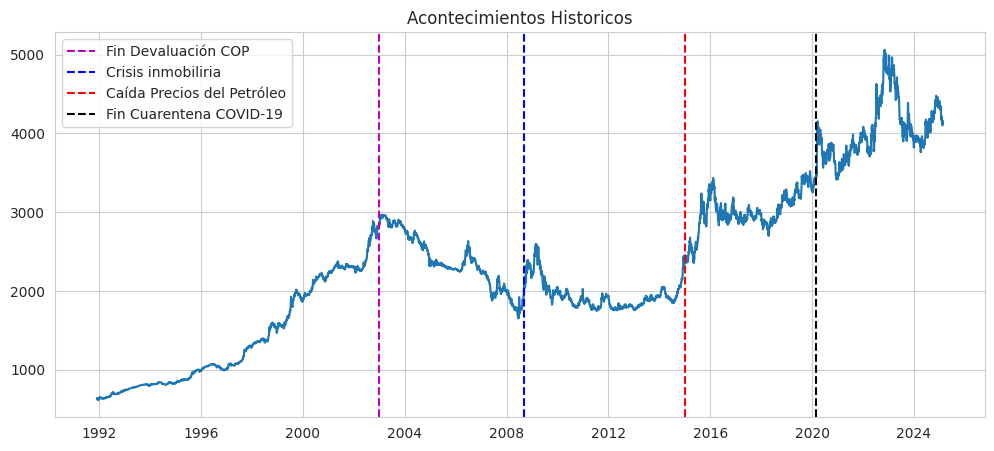

In [376]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
sns.lineplot(
    #label = 'TRM 1991-2024',
    y = data['VALOR'],
    x = data.index
).set(xlabel = None, ylabel = None)

# Agregar líneas verticales con etiquetas
plt.title("Acontecimientos Historicos")
plt.axvline(x=pd.Timestamp("2003-01-01"), color="m", linestyle="--", label="Fin Devaluación COP")
plt.axvline(x=pd.Timestamp("2008-09-01"), color="b", linestyle="--", label="Crisis inmobiliria")
plt.axvline(x=pd.Timestamp("2015-01-01"), color="r", linestyle="--", label="Caída Precios del Petróleo")
plt.axvline(x=pd.Timestamp("2020-03-01"), color="k", linestyle="--", label="Fin Cuarentena COVID-19")

# Mostrar leyenda
plt.legend()
# Mostrar gráfico
plt.show();

<hr>
<h2>¿Alguna relación política?</h2>
<hr>

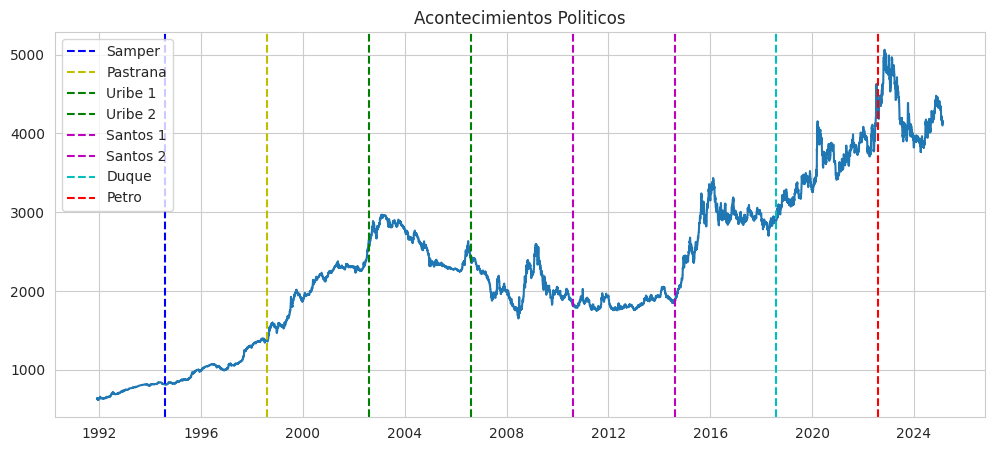

In [436]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
sns.lineplot(
    #label = 'TRM 1991-2024',
    y = data['VALOR'],
    x = data.index
).set(xlabel = None, ylabel = None)

# Agregar líneas verticales con etiquetas
plt.title("Acontecimientos Politicos")
plt.axvline(x=pd.Timestamp("1994-08-07"), color="b", linestyle="--", label = "Samper")
plt.axvline(x=pd.Timestamp("1998-08-07"), color="y", linestyle="--", label = "Pastrana")
plt.axvline(x=pd.Timestamp("2002-08-07"), color="g", linestyle="--", label = "Uribe 1")
plt.axvline(x=pd.Timestamp("2006-08-07"), color="g", linestyle="--", label = "Uribe 2")
plt.axvline(x=pd.Timestamp("2010-08-07"), color="m", linestyle="--", label = "Santos 1")
plt.axvline(x=pd.Timestamp("2014-08-07"), color="m", linestyle="--", label = "Santos 2")
plt.axvline(x=pd.Timestamp("2018-08-07"), color="c", linestyle="--", label = "Duque")
plt.axvline(x=pd.Timestamp("2022-08-07"), color="r", linestyle="--", label = "Petro")

# Mostrar leyenda
plt.legend()
# Mostrar gráfico
plt.show();